In [1]:
#####part3#####
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
# %run ./gdrive/MyDrive/3/part3/data_prep.ipynb
# %run ./gdrive/MyDrive/3/part3/model.ipynb
%run ./data_prep.ipynb
%run ./model.ipynb

BPE English ...
BPE Persian ...


In [3]:
dp = Data_prep()
eng_train, eng_test, per_train, per_test = dp.get_data()
test_data = get_test_data(dp)

creating vocabulary.
---done!---
---done!---


In [4]:
embed_size = 256
batch_size = 32
valid_batch_size = 20
total_itr = len(eng_train)/batch_size

learning_rate = 1e-4

eng_vocab_size = len(dp.eng_vocab)
per_vocab_size = len(dp.per_vocab)

load_model = False
save_model = True
num_epochs = 4

In [5]:
train_data = Dataset(eng_train, per_train)
validation_data = Dataset(eng_test, per_test)

train_loader = DataLoader(dataset=train_data, batch_size=batch_size, collate_fn=PadSequence, shuffle=True)
validation_loader = DataLoader(dataset=validation_data, batch_size=valid_batch_size, collate_fn=PadSequence, shuffle=True)

In [6]:
# torch.backends.cudnn.benchmark = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
model = Transformer(eng_vocab_size, per_vocab_size, embed_size).to(device)
criterion = nn.CrossEntropyLoss(ignore_index = dp.per_rev_vocab["<PAD>"])
optimizer = optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.98), eps=1e-9)

step = 0

if load_model:
    model = torch.load("./gdrive/MyDrive/3/part3.pth.tar")

In [ ]:
train_losses = []
validation_losses = []

In [10]:
model.train()
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)
dataloader_iterator = iter(validation_loader)
v_eng_sentences, v_per_sentences = next(dataloader_iterator)
v_eng_sentences, v_per_sentences = v_eng_sentences.to(device), v_per_sentences.to(device)

for epoch in range(num_epochs):
    print('-'*8+"epoch:"+str(epoch)+'-'*8)
    tt= time.time()
    print("total itrs:", int(total_itr))
    for idx, (eng_sentences, per_sentences) in enumerate(train_loader):
        
        eng_sentences, per_sentences = eng_sentences.to(device), per_sentences.to(device)

        tgt_mask = generate_square_subsequent_mask(per_sentences.shape[1]-1).to(device)

        outputs = model(eng_sentences, per_sentences[:,:-1], tgt_mask)
        loss = criterion(outputs, per_sentences[:, 1:])
        
        train_losses.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward(loss)
        optimizer.step()
        
        
        if not idx % 250:
            print('--idx:' + str(idx) + '--')
            print('loss:', round(loss.item(),4))
            print('time:', str(round(time.time()-tt, 3)) + 's')
            print('progress:',str(round(idx/total_itr*100, 2))+'%')
            tt= time.time()
            if save_model:
                  print('saving model ...')
                  torch.save(model, "./gdrive/MyDrive/3/part3.pth.tar")

        if (not idx % 750) and idx != 0:
            tgt_mask = generate_square_subsequent_mask(v_per_sentences.shape[1]).to(device)
            validation_outputs = model(v_eng_sentences, v_per_sentences, tgt_mask)
            validation_loss = criterion(validation_outputs, v_per_sentences)
            validation_losses.append(validation_loss.item())
            print('-'*25)
            print('validation loss: ' + str(validation_loss.item()))
            print('-'*25)
        
    src = torch.tensor(test_data[1]).to(device)
    translation = translate(model, src)
    print(eng_tokenizer.detokenize(reverse_numericalize(torch.tensor(src), dp.eng_vocab)))
    print(eng_tokenizer.detokenize(reverse_numericalize(translation[0], dp.per_vocab)))

--------epoch:0--------
total itrs: 19249
--idx:0--
loss: 9.9006
time: 0.239s
progress: 0.0%
saving model ...
--idx:250--
loss: 6.517
time: 21.035s
progress: 1.3%
saving model ...
--idx:500--
loss: 6.2049
time: 21.156s
progress: 2.6%
saving model ...
--idx:750--
loss: 5.9043
time: 20.687s
progress: 3.9%
saving model ...
-------------------------
validation loss: 7.9733195304870605
-------------------------
--idx:1000--
loss: 5.7483
time: 21.643s
progress: 5.2%
saving model ...
--idx:1250--
loss: 5.72
time: 20.95s
progress: 6.49%
saving model ...
--idx:1500--
loss: 5.4989
time: 21.062s
progress: 7.79%
saving model ...
-------------------------
validation loss: 8.353168487548828
-------------------------
--idx:1750--
loss: 5.5273
time: 21.645s
progress: 9.09%
saving model ...
--idx:2000--
loss: 5.3584
time: 21.366s
progress: 10.39%
saving model ...
--idx:2250--
loss: 5.4811
time: 21.296s
progress: 11.69%
saving model ...
-------------------------
validation loss: 8.521122932434082
------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


it is more comfortable by train .
این کار است که از آن است که به طور کلی است .
--------epoch:1--------
total itrs: 19249
--idx:0--
loss: 4.0346
time: 0.089s
progress: 0.0%
saving model ...
--idx:250--
loss: 4.064
time: 20.879s
progress: 1.3%
saving model ...
--idx:500--
loss: 4.1309
time: 20.221s
progress: 2.6%
saving model ...
--idx:750--
loss: 4.1399
time: 20.816s
progress: 3.9%
saving model ...
-------------------------
validation loss: 9.721525192260742
-------------------------
--idx:1000--
loss: 3.9739
time: 20.292s
progress: 5.2%
saving model ...
--idx:1250--
loss: 4.2053
time: 20.585s
progress: 6.49%
saving model ...
--idx:1500--
loss: 3.627
time: 20.212s
progress: 7.79%
saving model ...
-------------------------
validation loss: 9.726322174072266
-------------------------
--idx:1750--
loss: 3.883
time: 20.842s
progress: 9.09%
saving model ...
--idx:2000--
loss: 3.7312
time: 20.445s
progress: 10.39%
saving model ...
--idx:2250--
loss: 3.9158
time: 20.328s
progress: 11.69%
savin

In [28]:
model = torch.load("./part3.pth.tar", map_location=torch.device('cpu'))
src = torch.tensor(test_data[7]).to(device)
translation = translate(model, src[:-1])
print(eng_tokenizer.detokenize(reverse_numericalize(torch.tensor(src), dp.eng_vocab)))
print(per_tokenizer.detokenize(reverse_numericalize(translation[0], dp.per_vocab)))

in any case a cheap hotel .
در این ژی ژی - <UNK> <UNK>


<ipython-input-28-030a5aca4537>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(eng_tokenizer.detokenize(reverse_numericalize(torch.tensor(src), dp.eng_vocab)))


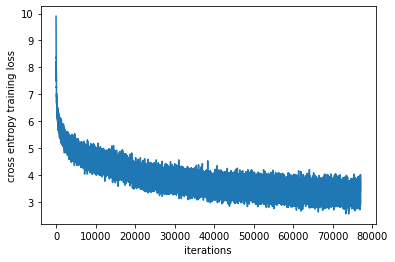

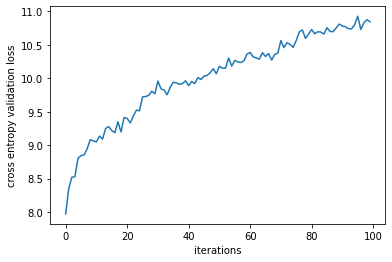

In [12]:
plt.plot(train_losses)
plt.xlabel('iterations')
plt.ylabel('cross entropy training loss')
plt.show()
plt.plot(validation_losses, label = 'validation data')
plt.xlabel('iterations')
plt.ylabel('cross entropy validation loss')
plt.show()

In [15]:
model = torch.load("./part3.pth.tar", map_location=torch.device('cpu'))

def get_translation(model, src):
    translation = translate(model, src[:-1])
    translation = reverse_numericalize(translation[0], dp.per_vocab)
    return eng_tokenizer.detokenize(reverse_numericalize(torch.tensor(src), dp.eng_vocab)), per_tokenizer.detokenize(translation)

In [16]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.nist_score import corpus_nist

In [17]:
num_english, persian = final_test_data(dp)
src = torch.tensor(test_data[1]).to(device)
english, translation = get_translation(model, src)
print(english)
print(translation)

it is more comfortable by train .
<UNK> <UNK> - <UNK> - <UNK> - 


<ipython-input-15-2890fab75e52>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return eng_tokenizer.detokenize(reverse_numericalize(torch.tensor(src), dp.eng_vocab)), per_tokenizer.detokenize(translation)


In [11]:
for i in range(249):
    
    num_english, persian = final_test_data(dp)
    src = torch.tensor(test_data[i]).to(device)
    english, translation = get_translation(model, src)
    bleu = corpus_bleu([persian[i]], [translation.split()], weights=(0.25, 0.25, 0.25, 0.25))
    nist = corpus_nist([persian[i]], [translation.split()])
    if bleu > 0.1:
        print('-'*30)
        print(i)
        
        print('BLEU:', bleu)
        print('NIST:', nist)
        print(translation)
        print(eng_tokenizer.detokenize(reverse_numericalize(torch.tensor(src), dp.eng_vocab)))

<ipython-input-8-2890fab75e52>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return eng_tokenizer.detokenize(reverse_numericalize(torch.tensor(src), dp.eng_vocab)), per_tokenizer.detokenize(translation)
/Users/ali/miniforge_x86_64/envs/pytorch_x86/lib/python3.8/site-packages/nltk/translate/bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/ali/miniforge_x86_64/envs/pytorch_x86/lib/python3.8/site-packages/nltk/translate/bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it

ZeroDivisionError: division by zero